In [305]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

from pandas import read_csv

In [306]:
"""
from pandas import read_html

filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
"""

"\nfrom pandas import read_html\n\nfilename = 'data/World_population_estimates.html'\ntables = read_html(filename, header=0, index_col=0, decimal='M')\ntable2 = tables[2]\ntable2.columns = ['census', 'prb', 'un', 'maddison', \n                  'hyde', 'tanton', 'biraben', 'mj', \n                  'thomlinson', 'durand', 'clark']\n"

In [307]:
filename = 'data/Census_Data.csv'
print (filename)
tables = read_csv(filename, header=0, index_col=0, decimal='M')
tables.columns = ['Population', 'Change', 'Rate']

data/Census_Data.csv


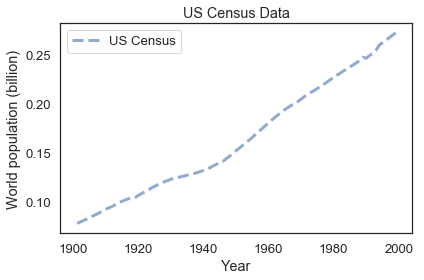

In [308]:
popData = tables.Population / 1e9
#change = tables.Change / 1e9
empty = TimeSeries()
plot_results(popData, empty, 'US Census Data')

In [309]:
def plot_results(census, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, '--', label='US Census')
  #  plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [318]:
init = State(babyboy=2)
p_0 = get_first_value(popData)

0.272690813

In [319]:

system = System(birth_rate = 1/18,
                #1918 birthrate (does not change, black death did not affect birthrate)
                death_rate1 = .0172,
                #death rate in 1900
                death_rate2 = .028, #code do be duplicated and run alongside curret, replacing .028 with 
                t_0 = 1900,
                t_end = 2016,
                init=init,
                alpha=0.025,
                beta=-0.0018)

,values
birth_rate,0.0555556
death_rate1,0.0172
death_rate2,0.028
t_0,1900
t_end,2016
init,babyboy 2 dtype: int64
alpha,0.025
beta,-0.0018


In [320]:
def update_func1(state, t, system):

    #print(type(state.babyboy))
    births = system.birth_rate * state.babyboy
   
    #change death rates at start of Spanish Flu
    
    if 1918 < t < 1922:
        deaths = system.death_rate2 * state.babyboy
        babyboy = state.babyboy + births - deaths
        return State(babyboy=babyboy)
    else:
        #deaths = system.death_rate1 * state.babyboy
        net_growth = system.alpha * state.babyboy + system.beta * state.babyboy**2
        net_growth = system.alpha * state.babyboy + system.beta * state.babyboy**2
        return 


    #add rebound pop changes later
   
    #babyboy = state.babyboy + births - deaths
    
    #return State(babyboy=babyboy)


In [321]:
state = update_func1(init, system.t_0, system)

In [322]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    
    state = system.init
    results[system.t_0] = state.babyboy
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results[t+1] = state.babyboy
        
    return results

In [323]:
results = run_simulation(system, update_func1);

AttributeError: 'NoneType' object has no attribute 'babyboy'

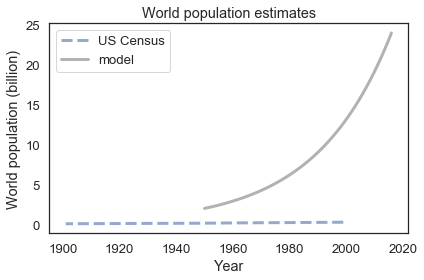

In [325]:
plot_results(popData, results, 'World population estimates')
#welp, gotta fix that!